In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
acc_names = ['ax', 'ay', 'az']
rate_gyro_names = ['gx', 'gy', 'gz']
positions = ["Laying_down", "Standing_up", "Walking"]

In [28]:
class Recording:
    def __init__(self, position, dataframe, sensor, iteration):
        self.position = position
        self.dataframe = dataframe
        self.sensor = sensor
        self.iteration = iteration

# Data analysis

In [29]:
def read_csv(filename, names) -> pd.DataFrame:
    return pd.read_csv(filename, usecols=[1, 2, 3], names= names, skiprows=[0])

In [30]:
def read_recordings() -> list[Recording]:
    recordings = []
    
    for position in positions:
        for i in range(1, 4):
            for sensor in ["Accelerometer", "Gyroscope"]:
                dataframe = (
                    read_csv(f"Data/ML_Lab_1_{position}_{i}/{sensor}.csv", names = acc_names 
                    if sensor == "Accelerometer"
                    else rate_gyro_names)
                )
                
                dataframe.index.name = f"{position} {sensor} {i}"

                recordings.append(Recording(position, dataframe, sensor, i))
                
    return recordings
        

In [31]:
laying_down_acc = read_csv("Data/ML_Lab_1_Laying_down_1/Accelerometer.csv", acc_names)


In [32]:
laying_down_rate_gyro = read_csv("Data/ML_Lab_1_Laying_down_1/Gyroscope.csv", rate_gyro_names)


##### Plot the accelerometer values using the plot functions accessible for panda dataframes. Plot all accelerometer values, i.e. all samples for all components of the accelerometer vector.

In [33]:
#for recording in read_recordings():
    #recording.dataframe.plot(title = f"{recording.position} {recording.sensor} {recording.iteration}")

<Axes: title={'center': 'Laying down accelerometer'}>

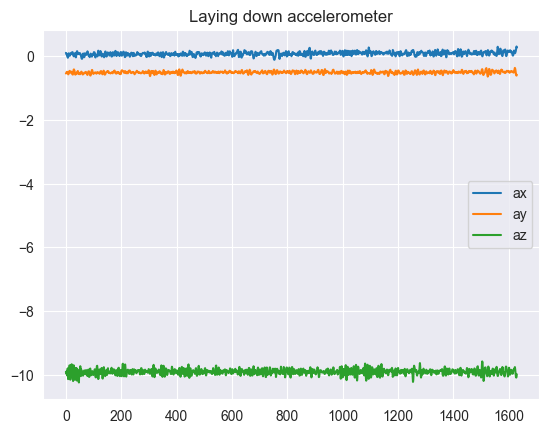

In [34]:
laying_down_acc.plot(title = "Laying down accelerometer")

##### What are we measuring with the accelerometer?

<Axes: title={'center': 'Laying down rate_gyro'}>

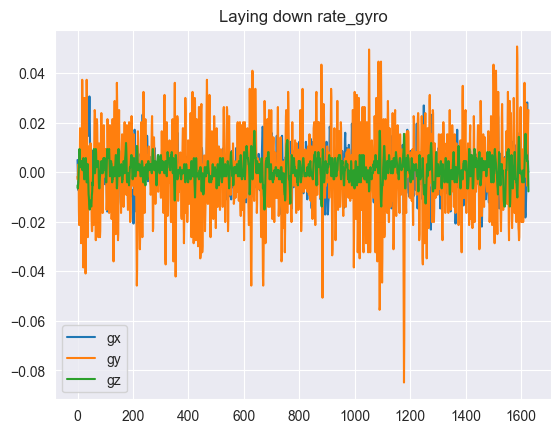

In [35]:
laying_down_rate_gyro.plot(title ="Laying down rate_gyro")

##### What are we measuring with the rate_gyro?

# Preprocessing the data

##### Why do you have these irregularities in your recordings? Or maybe you do not, how come?
Collected the data with the 7 seconds delay in the beginning to get in position. As for the walking movement, I started walking before collecting the data. 

##### Create a python function that can read one accelerometer file and one rategyro file, remove a specific number of samples in the beginning and in the end and output a dataframe with six columns, that is all the accelerometer and ratygyro attributes. What do you need as input to the function?

In [36]:
def pre_process_file(acc_file, rate_gyro_file, n) -> pd.DataFrame:
    acc_frame = read_csv(acc_file, acc_names)
    rate_gyro_frame = read_csv(rate_gyro_file, rate_gyro_names)


    acc_frame = acc_frame.drop(acc_frame.head(n).index).drop(acc_frame.tail(n).index)
    rate_gyro_frame = rate_gyro_frame.drop(rate_gyro_frame.head(n).index).drop(rate_gyro_frame.tail(n).index)

    return pd.concat([acc_frame, rate_gyro_frame], ignore_index=False)



In [37]:
laying_down = pre_process_file("Data/ML_Lab_1_Laying_down_1/Accelerometer.csv", "Data/ML_Lab_1_Laying_down_1/Gyroscope.csv", 3)
standing_up = pre_process_file("Data/ML_Lab_1_Standing_up_1/Accelerometer.csv", "Data/ML_Lab_1_Standing_up_1/Gyroscope.csv", 3)
walking = pre_process_file("Data/ML_Lab_1_Walking_1/Accelerometer.csv", "Data/ML_Lab_1_Walking_1/Gyroscope.csv", 3)

pre_processed_dataframes = []

for pos in positions:
    for x in range(1, 4):
        datframe = pre_process_file(f"Data/ML_Lab_1_{pos}_{x}/Accelerometer.csv", f"Data/ML_Lab_1_{pos}_{x}/Gyroscope.csv", 3)
        datframe.index.name = f"{pos} {x}"
        pre_processed_dataframes.append(datframe)


##### Store each dataframe, one for each recording, in a binary file using the to_pickle function.

# Python

##### Create a python function that can read all binary-files from one class. The with information of which class the data belongs to. The dataframe has now 7 columns.